In [1]:
import xarray as xr
import numpy as np
import glob2 as glob
import functions
import matplotlib.pyplot as plt

In [ ]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
files = glob.glob(rpath+'*soilmoisture.clm2.concatfiles.nc')

ds_list = {}

# Open pre-industrial dataset
ds_piClim = xr.open_dataset(files[2])
ds_piClim = ds_piClim.isel(time=slice(0,1740))
ds_piClim = functions.fix_clm_time(ds_piClim)

# Open divided 2xCO2 dataset
ds_2xCO2_i = xr.open_dataset(files[1])
ds_2xCO2_ii = xr.open_dataset(files[7])
ds_2xCO2 = xr.merge([ds_2xCO2_i.isel(time=slice(0,480)), ds_2xCO2_ii])
ds_2xCO2 = ds_2xCO2.isel(time=slice(0,1740))
ds_2xCO2 = functions.fix_clm_time(ds_2xCO2)
ds_list['CO2x2'] = ds_2xCO2

for i in [0, 3, 4, 5, 6]:
    casename = files[i].split('/')[-1]
    co2_conc = casename.split('_')[0]
    co2_conc = co2_conc.split('N')[-1]
    ds = xr.open_dataset(files[i])
    ds = ds.isel(time=slice(0,1740))
    ds = functions.fix_clm_time(ds)
    ds_list[co2_conc] = ds

['/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x1.8_f19_tn14_20240910.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x2_N1850_f19_tn14_20210317b_1705_20220430.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/N1850_f19_tn14_20190621.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x1.6_f19_tn14_20240910.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x4_f19_tn14_20210819.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x1.4_N1850_f19_tn14_20210317b_1705_20220430.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x2.8_f19_tn14_20210914.soilmoisture.clm2.concatfiles.nc', '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/NCO2x2_N1850_f19_tn14_20210317b_1705_20240909.soilmoisture

/tmp/ipykernel_321534/340541844.py:8: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds_piClim = xr.open_dataset(files[2])
/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/functions.py:45: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  months = ds.time_bounds.isel(hist_interval=0).dt.month.values
/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/arctic-cloud-feedbacks/functions.py:46: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out

CO2x1.8
CO2x1.6
CO2x4
CO2x1.4
CO2x2.8


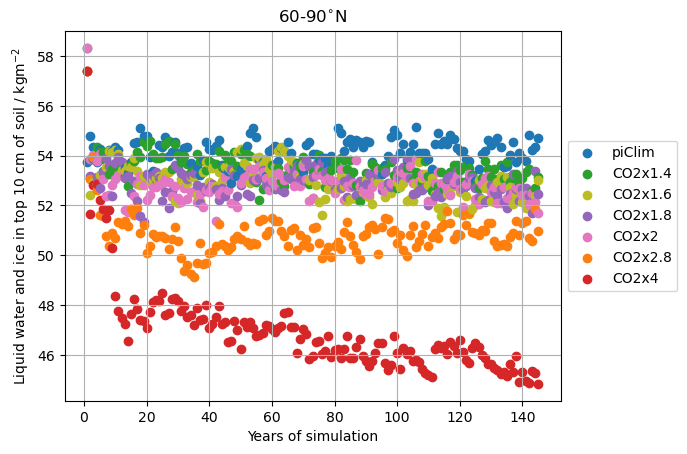

In [90]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
annual_piClim = piClim_Arctic.groupby(piClim_Arctic.time.dt.year).mean('time')

ds_Arctic_list = {}
for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
    ds = ds_list[k]
    ds_Arctic = ds[var].sel(lat=slice(Arctic_lim,90))
    annual = ds_Arctic.groupby(ds_Arctic.time.dt.year).mean('time')
    ds_Arctic_list[k] = annual

color_list = ['tab:green', 'tab:olive', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:red']
colors = {}
for i, k in enumerate(['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']):
    colors[k] = color_list[i]

plt.scatter(1, (annual_piClim.isel(year=0)*area_weights).sum(), color='tab:blue', label='piClim')
for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
    plt.scatter(1, (ds_Arctic_list[k].isel(year=0)*area_weights).sum(), color=colors[k], label=k)

for i in range(1, len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
        plt.scatter(1+i, (ds_Arctic_list[k].isel(year=i)*area_weights).sum(), color=colors[k])
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N')
plt.show()

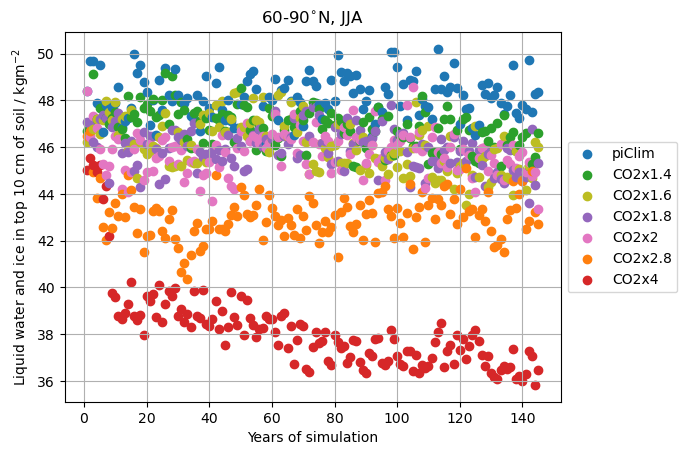

In [92]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
season = 'JJA'

area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
piClim_season = piClim_Arctic.sel(time=piClim_Arctic.time.dt.season==season)
annual_piClim = piClim_season.groupby(piClim_season.time.dt.year).mean('time')

ds_Arctic_list = {}
for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
    ds = ds_list[k]
    ds_Arctic = ds[var].sel(lat=slice(Arctic_lim,90))
    ds_season = ds_Arctic.sel(time=ds_Arctic.time.dt.season==season)
    annual = ds_season.groupby(ds_season.time.dt.year).mean('time')
    ds_Arctic_list[k] = annual

color_list = ['tab:green', 'tab:olive', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:red']
colors = {}
for i, k in enumerate(['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']):
    colors[k] = color_list[i]

plt.scatter(1, (annual_piClim.isel(year=0)*area_weights).sum(), color='tab:blue', label='piClim')
for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
    plt.scatter(1, (ds_Arctic_list[k].isel(year=0)*area_weights).sum(), color=colors[k], label=k)

for i in range(1, len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    for k in ['CO2x1.4', 'CO2x1.6', 'CO2x1.8', 'CO2x2', 'CO2x2.8', 'CO2x4']:
        plt.scatter(1+i, (ds_Arctic_list[k].isel(year=i)*area_weights).sum(), color=colors[k])
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.title(str(Arctic_lim)+'-90$^{\circ}$N, '+season)
plt.show()